As always, import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

Importing our numeric data

In [2]:
df = pd.read_csv('data/players_with features_no_nan_only_num_values.csv')

In [3]:
df.head(5)

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,skin_colour,gravity,meanIAT_yellowCards,meanIAT_yellowReds,meanIAT_redCards,meanIAT_gravity,meanExp_yellowCards,meanExp_yellowReds,meanExp_redCards,meanExp_gravity
0,177.0,72.0,144.0,65.0,32.0,47.0,10.0,21.0,1.0,2.0,0.375,116.674213,0.058858,0.000535,0.001203,0.114196,0.093395,0.001087,0.002447,0.205938
1,179.0,82.0,427.0,183.0,101.0,143.0,88.0,33.0,0.0,2.0,0.750,95.589050,0.020451,0.000000,0.001752,0.075289,0.013638,0.000000,-0.000520,-0.002640
2,182.0,71.0,654.0,247.0,179.0,228.0,9.0,19.0,0.0,0.0,0.125,19.000000,0.011768,0.000000,0.000000,0.011768,0.018965,0.000000,0.000000,0.018965
3,187.0,80.0,285.0,138.0,57.0,90.0,28.0,50.0,4.0,3.0,0.125,276.224227,0.054788,0.006257,0.008396,0.524554,0.085066,0.011986,0.018192,1.050962
4,180.0,68.0,214.0,88.0,54.0,72.0,11.0,34.0,0.0,0.0,1.000,34.000000,0.049788,0.000000,0.000000,0.049788,0.077372,0.000000,0.000000,0.077372


Creating target data:

In [4]:
target = df['skin_colour']

In [5]:
target.unique()

array([ 0.375,  0.75 ,  0.125,  1.   ,  0.25 ,  0.   ,  0.5  ,  0.875,
        0.625])

Remember, the skin colour is the average over the two raters

For easier classification, we divide the skin colour list into four classes. We believe four classes are enough to get an idea.

In [6]:
def separator(x):
    if x <= 0.25:
        return 0
    elif x <= 0.5:
        return 1
    elif x <= 0.75:
        return 2
    elif x <= 1.:
        return 3

In [7]:
target = target.apply(separator)

In [8]:
target.head()

0    1
1    2
2    0
3    0
4    3
Name: skin_colour, dtype: int64

In [9]:
cols = ['height', 'weight', 'games', 'victories', 'ties', 'defeats', 'goals', 'skin_colour']
df = df.drop(cols, axis = 1)
data = df.as_matrix()

In [10]:
data.shape

(1406, 12)

In [11]:
target.shape

(1406,)

In [12]:
forest = RandomForestClassifier(n_estimators = 100)

In [13]:
forest.fit(data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
imp = forest.feature_importances_

In [39]:
importance = pd.DataFrame([forest.feature_importances_], columns = df.columns)
importance.columns

Index(['yellowCards', 'yellowReds', 'redCards', 'gravity',
       'meanIAT_yellowCards', 'meanIAT_yellowReds', 'meanIAT_redCards',
       'meanIAT_gravity', 'meanExp_yellowCards', 'meanExp_yellowReds',
       'meanExp_redCards', 'meanExp_gravity'],
      dtype='object')

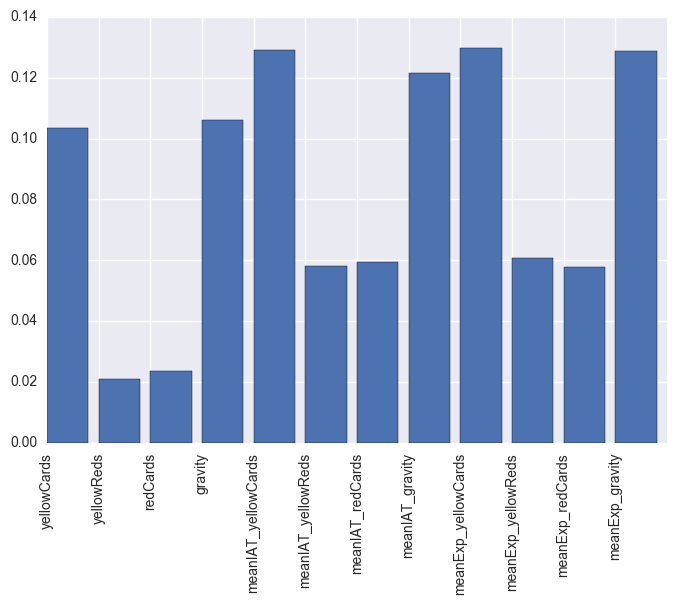

In [48]:
fig, ax = plt.subplots()
ax.bar(range(len(imp)), imp)
ax.set_xticks(range(0, 12))
ax.set_xticklabels(importance.columns, rotation=90)

In [94]:
df.columns

Index(['yellowCards', 'yellowReds', 'redCards', 'gravity',
       'meanIAT_yellowCards', 'meanIAT_yellowReds', 'meanIAT_redCards',
       'meanIAT_gravity', 'meanExp_yellowCards', 'meanExp_yellowReds',
       'meanExp_redCards', 'meanExp_gravity'],
      dtype='object')

In [108]:
f.feature_importances_

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

In [13]:
from sklearn.cross_validation import cross_val_score

In [14]:
f = RandomForestClassifier(n_estimators = 100)

In [128]:
target = target.values

In [144]:
target = np.array(target)

In [15]:
scores = cross_val_score(f, data, target, cv=10, scoring='accuracy')

In [16]:
scores

array([ 0.71328671,  0.70422535,  0.71126761,  0.70422535,  0.69503546,
        0.71428571,  0.71942446,  0.69064748,  0.67625899,  0.65467626])

idea: use a hold-out sample